In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
#train test split
from sklearn.cross_validation import train_test_split
#implementing decision tree
from sklearn.tree import DecisionTreeClassifier

# cross validation
from sklearn.cross_validation import cross_val_score

# logistic regression
from sklearn.linear_model import LogisticRegression

# random forest

from sklearn.ensemble import RandomForestClassifier

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loan= pd.read_csv('loandata.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072931,-0.554036,-0.215127,0.276411,0.432477,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134302,-0.038700,-0.215127,0.276411,0.432477,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393427,-0.554036,-0.939534,0.276411,0.432477,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.461686,0.251774,-0.308599,0.276411,0.432477,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097649,-0.554036,-0.063236,0.276411,0.432477,Urban,Y


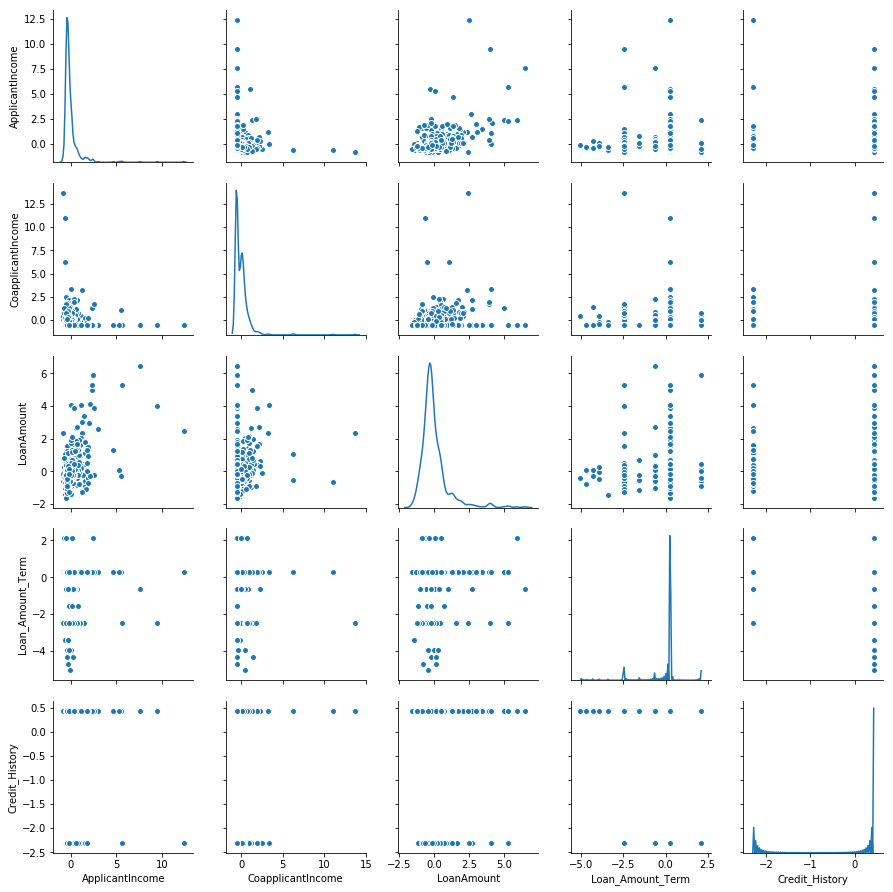

In [4]:
sns.pairplot(loan, diag_kind= 'kde')

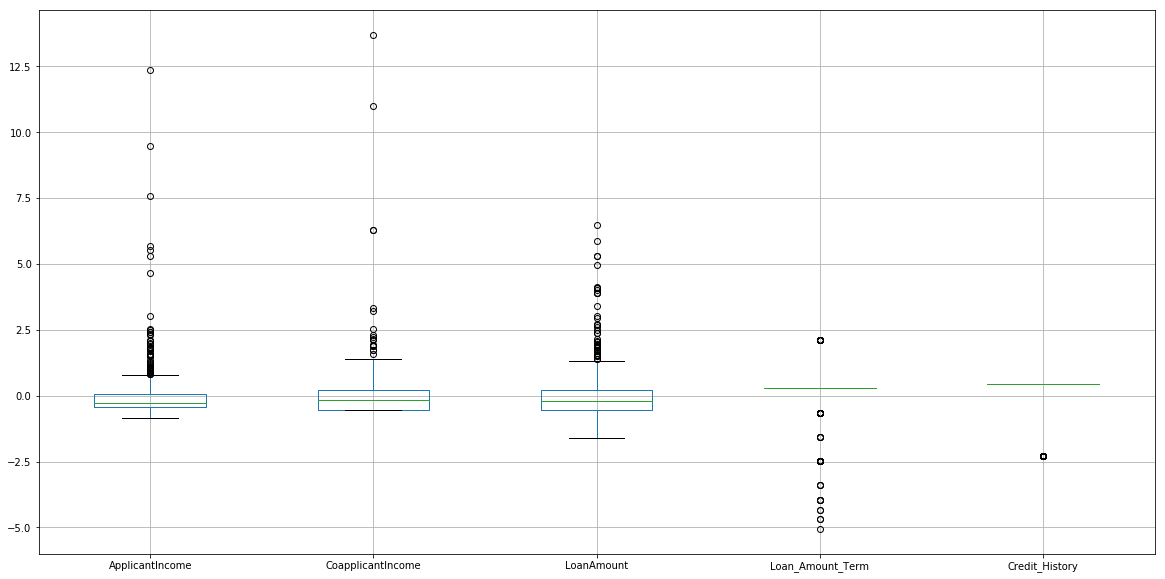

In [5]:
loan.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], figsize=(20,10))

In [6]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
loan['Gender']= loan['Gender'].replace({ 'Male': 1, 'Female':0})

In [8]:
loan['Married']= loan['Married'].replace({ 'Yes': 1, 'No':0})
loan['Education']= loan['Education'].replace({ 'Graduate': 1, 'Not Graduate':0})
loan['Self_Employed']= loan['Self_Employed'].replace({ 'Yes': 1, 'No':0})
loan['Loan_Status']= loan['Loan_Status'].replace({ 'Y': 1, 'N':0})


In [9]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Missing value Treatment

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(8), int64(2), object(3)
memory usage: 62.4+ KB


In [11]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [12]:
loan['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [13]:
loan['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [14]:
loan['Self_Employed'].value_counts()

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

In [15]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

replacing missing variables by those whose category is in majority

In [16]:
loan['Gender'].fillna(value='1',inplace=True)
loan['Married'].fillna(value='1',inplace=True)
loan['Self_Employed'].fillna(value='0',inplace=True)
loan['Dependents'].fillna(value='0',inplace=True)
# missing values are removed now

In [17]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [18]:
# creating dummy variables for dependent
dep=pd.get_dummies(loan['Dependents'])
loan = pd.concat([loan,dep],axis=1)

In [19]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
# creating dummy variables for property area
pa=pd.get_dummies(loan['Property_Area'])
loan = pd.concat([loan,pa],axis=1)

In [21]:
loan= loan.drop("Property_Area", axis=1)

In [22]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,LP001002,1,0,0,1,0,0.072931,-0.554036,-0.215127,0.276411,0.432477,1,1,0,0,0,0,0,1
1,LP001003,1,1,1,1,0,-0.134302,-0.038700,-0.215127,0.276411,0.432477,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,1,-0.393427,-0.554036,-0.939534,0.276411,0.432477,1,1,0,0,0,0,0,1
3,LP001006,1,1,0,0,0,-0.461686,0.251774,-0.308599,0.276411,0.432477,1,1,0,0,0,0,0,1
4,LP001008,1,0,0,1,0,0.097649,-0.554036,-0.063236,0.276411,0.432477,1,1,0,0,0,0,0,1


## Checking for Outliers

In [23]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', '0', '1', '2',
       '3+', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [24]:
loan_df= loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]
loan_df= pd.DataFrame(loan_df)
loan_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072931,-0.554036,-0.215127,0.276411,0.432477
1,-0.134302,-0.038700,-0.215127,0.276411,0.432477
2,-0.393427,-0.554036,-0.939534,0.276411,0.432477
3,-0.461686,0.251774,-0.308599,0.276411,0.432477
4,0.097649,-0.554036,-0.063236,0.276411,0.432477


In [25]:
from scipy import stats
z = np.abs(stats.zscore(loan_df))
print(z)

[[0.07299082 0.55448733 0.21124125 0.2732313  0.41173269]
 [0.13441195 0.03873155 0.21124125 0.2732313  0.41173269]
 [0.39374734 0.55448733 0.94899647 0.2732313  0.41173269]
 ...
 [0.43717437 0.47240418 1.27616847 0.2732313  0.41173269]
 [0.35706382 0.55448733 0.49081614 0.2732313  0.41173269]
 [0.13441195 0.55448733 0.15174486 0.2732313  2.42876026]]


In [26]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [27]:
z[155][2]

5.4052178346859625

In [28]:
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      0.477571
CoapplicantIncome    0.785050
LoanAmount           0.753616
Loan_Amount_Term     0.000000
Credit_History       0.000000
dtype: float64


In [29]:
print(loan_df < (Q1 - 1.5 * IQR)) |(loan_df > (Q3 + 1.5 * IQR))

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              False              False       False             False   
1              False              False       False             False   
2              False              False       False             False   
3              False              False       False             False   
4              False              False       False             False   
5              False              False       False             False   
6              False              False       False             False   
7              False              False       False             False   
8              False              False       False             False   
9              False              False       False             False   
10             False              False       False             False   
11             False              False       False             False   
12             False              False       False

TypeError: Could not compare [None] with block values

In [30]:
loan_df = loan_df[(z < 3).all(axis=1)]


In [31]:
loan_df.shape

(577, 5)

In [32]:
loan.shape # here our rows is reduced to 577 from 614

(614, 19)

In [33]:
loan_df.describe(percentiles=[.003,.01,.25,.50,.75,.99,.997]).T

,count,mean,std,min,0.3%,1%,25%,50%,75%,99%,99.7%,max
ApplicantIncome,577.0,-0.120713,0.485420,-0.859948,-0.798289,-0.716718,-0.420763,-0.270658,0.021041,1.826044,1.981470,2.498516
CoapplicantIncome,577.0,-0.068497,0.564390,-0.554036,-0.554036,-0.554036,-0.554036,-0.125159,0.215892,1.913151,2.237164,2.514740
LoanAmount,577.0,-0.129289,0.656343,-1.605520,-1.372869,-1.254533,-0.542278,-0.215127,0.158760,1.943136,2.291225,2.729234
Loan_Amount_Term,577.0,0.092776,0.796155,-2.487699,-2.487699,-2.487699,0.276411,0.276411,0.276411,2.119151,2.119151,2.119151
Credit_History,577.0,0.023993,0.976883,-2.308163,-2.308163,-2.308163,0.432477,0.432477,0.432477,0.432477,0.432477,0.432477


In [34]:
normalized_df=(loan_df-loan_df.mean())/loan_df.std()
loan = loan.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'], 1)
loan = pd.concat([loan,normalized_df],axis=1)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,1,0,0,1,0,1,1,0,0,0,0,0,1,0.398920,-0.860290,-0.130782,0.230653,0.41815
1,LP001003,1,1,1,1,0,0,0,1,0,0,1,0,0,-0.027996,0.052795,-0.130782,0.230653,0.41815
2,LP001005,1,1,0,1,1,1,1,0,0,0,0,0,1,-0.561810,-0.860290,-1.234482,0.230653,0.41815
3,LP001006,1,1,0,0,0,1,1,0,0,0,0,0,1,-0.702429,0.567464,-0.273195,0.230653,0.41815
4,LP001008,1,0,0,1,0,1,1,0,0,0,0,0,1,0.449840,-0.860290,0.100639,0.230653,0.41815


In [35]:
loan= loan.drop("Loan_ID", 1)

Outliers are removed by calculating the z scores and then removing values with z<3

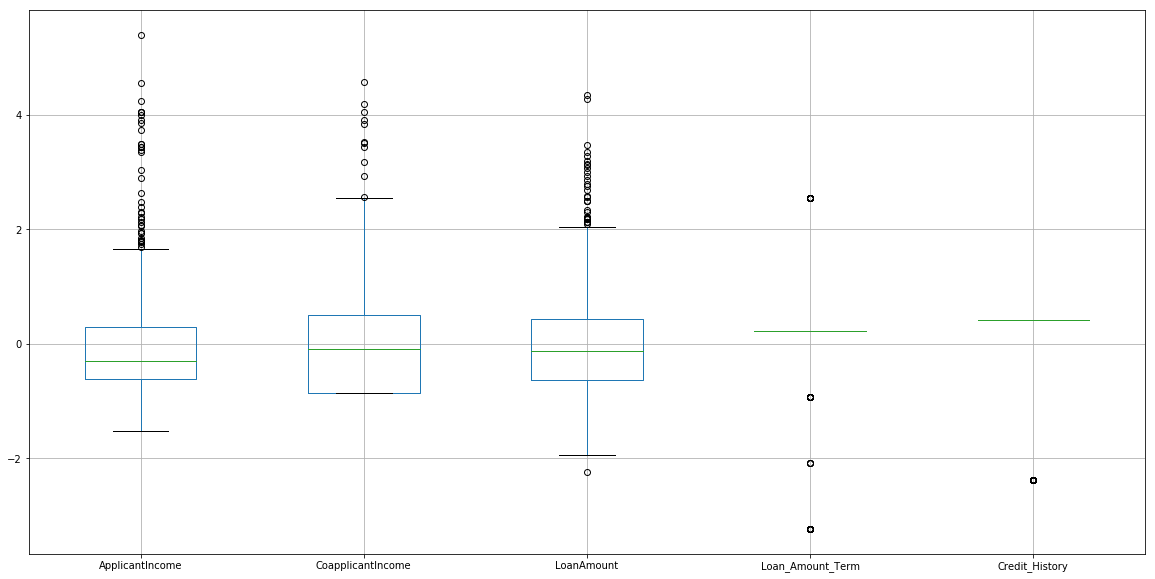

In [36]:
normalized_df.boxplot(column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], figsize=(20,10))

In [37]:
# original churn rate, as i want to see if the data is imbalanced or not.
loan_status = (sum(loan['Loan_Status'])/len(loan['Loan_Status'].index))*100
loan_status

68.72964169381108

In [44]:
x= loan.drop('Loan_Status', axis =1)
y= loan['Loan_Status']

TypeError: drop() got multiple values for argument 'axis'

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

## Designing the model

In [43]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0,1,1,0,0,0,0,0,1,0.398920,-0.860290,-0.130782,0.230653,0.41815
1,1,1,1,1,0,0,0,1,0,0,1,0,0,-0.027996,0.052795,-0.130782,0.230653,0.41815
2,1,1,0,1,1,1,1,0,0,0,0,0,1,-0.561810,-0.860290,-1.234482,0.230653,0.41815
3,1,1,0,0,0,1,1,0,0,0,0,0,1,-0.702429,0.567464,-0.273195,0.230653,0.41815
4,1,0,0,1,0,1,1,0,0,0,0,0,1,0.449840,-0.860290,0.100639,0.230653,0.41815


In [42]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
pred_lr = model_lr.predict(x_test)
metrics.accuracy_score(y_test,pred_lr)

ValueError: could not convert string to float: '3+'